In [ ]:
#|hide
from mletrics.stability import *
from mletrics.classification import *

# mletrics

> Machine learning metrics that are not easy to found.

## Install

`pip install mletrics`

## How to use

### Calculating psi values

In [ ]:
from mletrics.stability import psi

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from pathlib import Path

p = Path('..')
df = pd.read_csv(p/'datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
cat_vars = ['Pclass', 'Sex', 'Embarked']
num_vars = ['Age', 'SibSp', 'Fare']
features = cat_vars + num_vars
target = 'Survived'

X = df[features].copy()
y = df[target].copy()

In [ ]:
num_pipe = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=-999))
])

cat_pipe = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
]) 

transformers = ColumnTransformer(transformers=[
                ('numeric', num_pipe, num_vars),
                ('categoric', cat_pipe, cat_vars)
])

model = Pipeline(steps=[
        ('transformers', transformers),
        ('model', RandomForestClassifier(random_state=42, max_depth=3))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

y_proba_train = model.predict_proba(X_train)[:,1]
y_proba_test  = model.predict_proba(X_test)[:,1]

In [ ]:
# calculate psi value for the model probability between train and test
psi(y_proba_train, y_proba_test)

0.06001324825109782

- PSI < 0.1 - No change. You can continue using existing model.
- PSI >= 0.1 but less than 0.2 - Slight change is required.
- PSI >= 0.2 - Significant change is required. Ideally, you should not use this model any more.

Reference: https://www.listendata.com/2015/05/population-stability-index.html

### Calculating the KS

In [ ]:
from mletrics.classification import ks

ks(y_test, y_proba_test)

0.5886743886743887

Comparing with the `ks` calculated by `scikit-plot`:

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

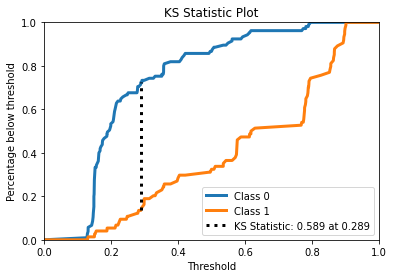

In [ ]:
from scikitplot.metrics import plot_ks_statistic

plot_ks_statistic(y_test, np.column_stack([1-y_proba_test, y_proba_test]))